In [1]:
import numpy as np
import itertools
import math

In [2]:
from utils import *
# from transformations.single_object.transform_single_object import transform_single_object

## Input images

In [3]:
test_img_path = './data/IPPN_full/ara2012_plant120_rgb.png'
test_mask_path = './data/IPPN_full/ara2012_plant120_label.png'

In [4]:
test_img = read(test_img_path)
test_mask = read(test_mask_path)

In [5]:
background = read('./data/background/soil_brown.jpg')

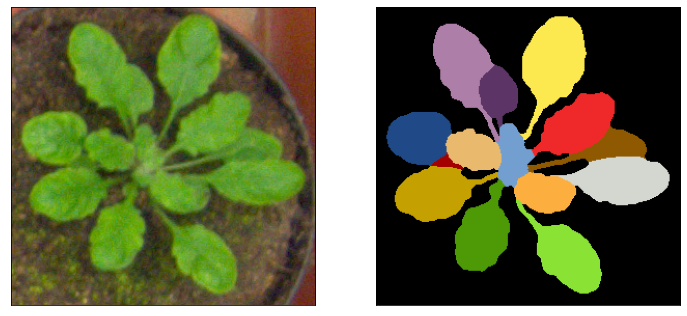

In [6]:
show([test_img, test_mask])

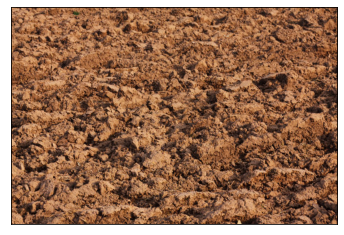

In [7]:
show(background)

In [8]:
def semantic2binary(mask):
    return (mask > 0).max(axis=2).astype(int) * 255

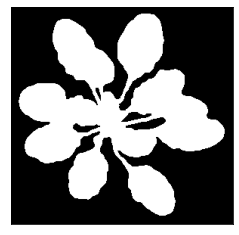

In [9]:
show(semantic2binary(test_mask))

In [10]:
def semantic2binary_list(mask):
    """Input RGB image"""
    unsqueezed_mask = mask.reshape(-1, mask.shape[2])
    masks_colors = np.unique(unsqueezed_mask, axis=0)
    background_index = np.argwhere(np.sum(masks_colors, axis=1) == 0)
    masks_colors = np.delete(masks_colors, background_index, 0)
    colors_count = masks_colors.shape[0]
    
    masks = []
    for i in range(colors_count):
        masks.append((mask == masks_colors[i]).reshape(mask.shape).astype(int) * 255)    
    
    return masks

In [11]:
m_l = semantic2binary_list(test_mask)

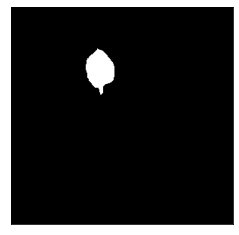

In [12]:
show(m_l[2])

In [13]:
def generate_colors(n):
    levels_count = math.ceil(math.pow(n+2, 1/3)) # remove black and white
    step = 1 / levels_count
    levels = [1 - (step * i) for i in range(levels_count)]
    
    colors = []
    for p in itertools.product(levels, repeat=3):
        colors.append((np.array([*p]) * 255).astype(int))
    
    return colors[1:n+1]

In [16]:
def binary_list2semantic(mask_list):
    main_mask = np.zeros_like(mask_list[0])
    colors = generate_colors(len(mask_list))
    
    for i, mask in enumerate(mask_list):
        main_mask[:, :, :3][mask[:,:,0] > 0] = colors[i]

    return main_mask

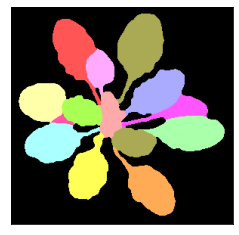

In [17]:
mask = binary_list2semantic(m_l)
show(mask)